In [1]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline

In [4]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools

In [5]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [6]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)
atlas2          = pd.read_pickle(constants.PREPROCESSED_ATLAS_2_FILE_PATH)


In [7]:
atlas.head()

Invoice Date  Invoice #  Invoice Amount  \
Customers                                                             
University 1   2015-03-20 00:00:00-04:00  ATLAS 315         72000.0   
University 102 2015-05-28 00:00:00-04:00      AJ501          3500.0   
University 3   2015-06-23 00:00:00-04:00      AJ502          3500.0   
University 4   2015-06-26 00:00:00-04:00      AJ503          6500.0   
University 5   2015-10-07 00:00:00-04:00      AJ504           750.0   

               Subscription            Account Code   \
Customers                                              
University 1         1 Year  4700-0-00-00000-18-0000   
University 102       1 Year  4700-0-00-00000-16-0000   
University 3         1 Year  4700-0-00-00000-17-0000   
University 4         1 Year  4700-0-00-00000-32-0000   
University 5         1 Year  4700-0-00-00000-20-0000   

                           Service Start               Service End  
Customers                                                           
University 1   2015-03-18 00:00:00-04:00 2016-06-30 00:00:00-04:00  
University 102 2015-06-01 00:00:00-04:00 2016-06-30 00:00:00-04:00  
University 3   2015-06-10 00:00:00-04:00 2016-06-30 00:00:00-04:00  
University 4   2015-06-01 00:00:00-04:00 2016-06-30 00:00:00-04:00  
University 5   2015-10-05 00:00:00-04:00 2016-09-30 00:00:00-04:00

In [10]:
(atlas["Invoice Date"] - atlas["Service Start"]).apply(lambda date: date.days)

Customers
University 1       2.0
University 102    -4.0
University 3      13.0
University 4      25.0
University 5       2.0
                  ... 
University 211    74.0
University 125    94.0
University 311    16.0
University 120   -57.0
University 312     1.0
Length: 669, dtype: float64

<AxesSubplot:xlabel='Customers'>

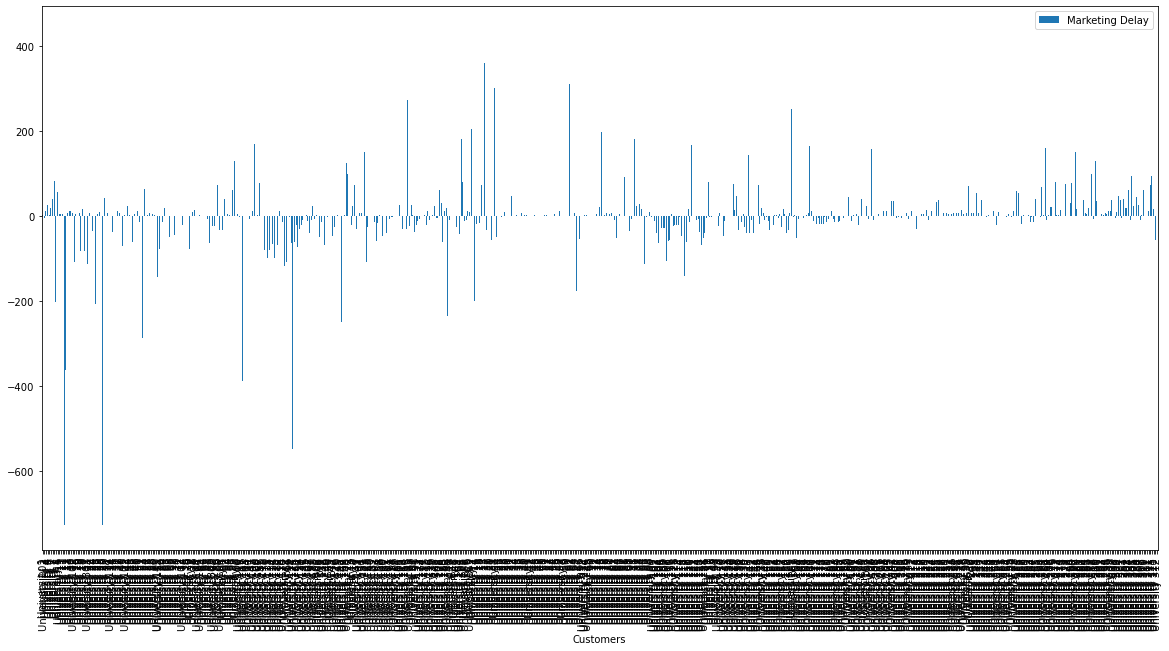

In [39]:
# Plot delays between marketing initiation and payment date (NOTE: This is sample data and not accurate until relevant data is available.)
marketing_delay = atlas["Invoice Date"] - atlas["Service Start"]
marketing_delay_days = marketing_delay.apply(lambda date: date.days)
marketing_delay_df = pd.DataFrame(marketing_delay_days, columns=["Marketing Delay"])
marketing_delay_df.plot.bar(figsize=(20, 10))

# TODO Group by customer regardless and Group by subscription length.
# TODO Response time for each state
# TODO Response time for each type of customer ("ATLAS Customer Type")
# TODO Response time for each type of customer ("Organization Record Type")
# TODO Data on potential customers and %success


<AxesSubplot:ylabel='Customers'>

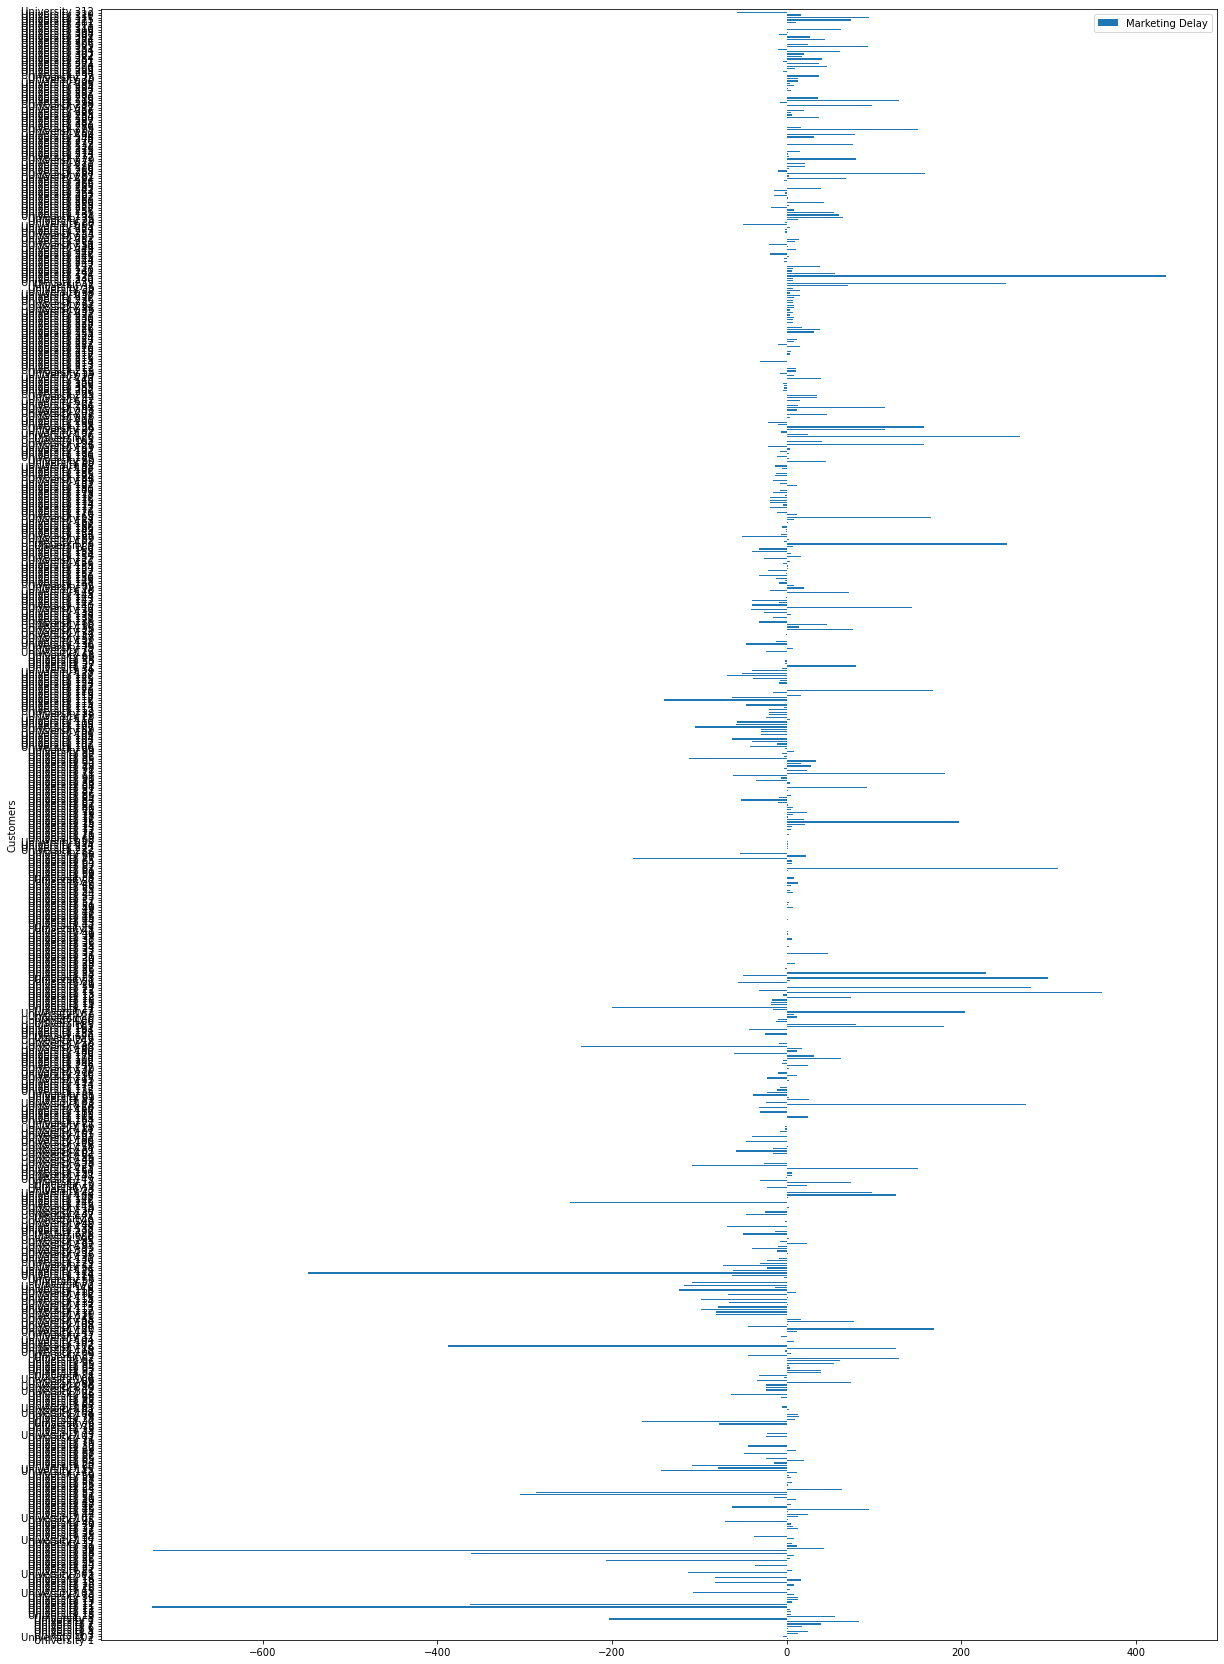

In [40]:
marketing_delay_df.plot.barh(figsize=(20, 30))

In [62]:
# Basic info
total_invoiced_per_customer = atlas.groupby(["Customers"]).sum()
total_invoiced_per_customer.head()

Invoice Amount
Customers                     
University 1          139000.0
University 10           4400.0
University 100          3000.0
University 101          5750.0
University 102         10500.0

In [81]:
atlas.head(1)

Invoice Date  Invoice #  Invoice Amount  \
Customers                                                           
University 1 2015-03-20 00:00:00-04:00  ATLAS 315         72000.0   

             Subscription            Account Code              Service Start  \
Customers                                                                      
University 1       1 Year  4700-0-00-00000-18-0000 2015-03-18 00:00:00-04:00   

                           Service End  
Customers                               
University 1 2016-06-30 00:00:00-04:00

In [13]:
def fcn(df):
    print(f"Size of df: {df.size}")
    # dfs = df["Subscription"]
    # print(f"Contents of of df[Subscription]: {dfs}")
    # print(f"Contents of of df: {df}")

    customer_subscriptions_ordered_by_date = df.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")
    # subscriptions = df#.reset_index().loc[["Subscription", "Service Start"]]
    # subscriptions = df["Subscription"].values
    print(customer_subscriptions_ordered_by_date)

    print(customer_subscriptions_ordered_by_date)

    # TODO fcn to compute upgrade, downgrade, and delays between them.

    return df


# Calculate conversion rates across various subscription combinations
repeat_customers = atlas.index.duplicated()
print(f"There are {repeat_customers.sum()} universities in this dataset who purchased 2 or more subscriptions.")
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
atlas.loc[repeat_customers].groupby("Customers").apply(fcn)

# TODO Reduce #groups by also grouping by location, type of customer etc.

# TODO Add a category and grouping everywhere based on total or trailing invoice value (0-100k, 100k-1M, etc)

# TODO: Tag the following:
# - Drop-off in subscription length
# - Drop-off in subscription coverage
# - Upgrades with coverage gaps
# - Upgrades with no coverage gaps
# - Any coverage gaps

# TODO Find late payers past threshold

 
University 55       1 Year 2020-09-11 00:00:00-04:00
              Subscription             Service Start
Customers                                           
University 55       1 Year 2020-09-11 00:00:00-04:00
Size of df: 7
              Subscription             Service Start
Customers                                           
University 56     3 Months 2020-03-27 00:00:00-04:00
              Subscription             Service Start
Customers                                           
University 56     3 Months 2020-03-27 00:00:00-04:00
Size of df: 14
              Subscription             Service Start
Customers                                           
University 57      3 Years 2018-05-15 00:00:00-04:00
University 57     3 Months 2020-04-01 00:00:00-04:00
              Subscription             Service Start
Customers                                           
University 57      3 Years 2018-05-15 00:00:00-04:00
University 57     3 Months 2020-04-01 00:00:00-04:00
Size of df: 21


Invoice Date  Invoice #  Invoice Amount  \
Customers                                                             
University 7   2015-12-10 00:00:00-05:00      AJ507         16200.0   
University 1   2015-12-11 00:00:00-05:00     AJ5081         67000.0   
University 15  2016-01-06 00:00:00-05:00      AJ509           750.0   
University 15  2016-05-10 00:00:00-04:00      AJ516          1000.0   
University 15  2020-01-13 00:00:00-05:00     000251          2350.0   
...                                  ...        ...             ...   
University 261 2020-10-19 00:00:00-04:00  NB101920A          2500.0   
University 284 2020-10-19 00:00:00-04:00  NB101920B           410.0   
University 284 2020-10-28 00:00:00-04:00   NB102320           300.0   
University 301 2020-11-03 00:00:00-05:00   NB101920            40.0   
University 211 2020-11-03 00:00:00-05:00   NB110320           500.0   

               Subscription            Account Code   \
Customers                                              
University 7         1 Year  4700-4-11-00100-00-1502   
University 1         1 Year  4700-0-00-00000-00-0000   
University 15        1 Year  4700-0-00-00000-00-0000   
University 15        1 Year  4700-0-00-00000-00-0000   
University 15        1 Year  4700-0-00-00000-00-0000   
...                     ...                      ...   
University 261       1 Year  4700-0-00-00000-00-0000   
University 284       1 Year  4700-0-00-00000-00-0000   
University 284       1 Year  4700-0-00-00000-00-0000   
University 301     6 Months  4700-0-00-00000-00-0000   
University 211       1 Year  4700-0-00-00000-00-0000   

                           Service Start               Service End  
Customers                                                           
University 7   2015-09-18 00:00:00-04:00 2016-12-31 00:00:00-05:00  
University 1   2016-07-01 00:00:00-04:00 2017-12-31 00:00:00-05:00  
University 15  2016-01-01 00:00:00-05:00 2017-01-31 00:00:00-05:00  
University 15  2016-05-06 00:00:00-04:00 2017-04-30 00:00:00-04:00  
University 15  2020-01-31 00:00:00-05:00 2021-01-31 00:00:00-05:00  
...                                  ...                       ...  
University 261 2020-09-08 00:00:00-04:00 2021-10-31 00:00:00-04:00  
University 284 2020-10-01 00:00:00-04:00 2021-09-30 00:00:00-04:00  
University 284 2020-10-01 00:00:00-04:00 2021-09-30 00:00:00-04:00  
University 301 2020-10-23 00:00:00-04:00 2021-04-23 00:00:00-04:00  
University 211 2020-08-21 00:00:00-04:00 2021-08-31 00:00:00-04:00  

[358 rows x 7 columns]

In [121]:
# atlas.columns
atlas.loc[:, ["Subscription", "Service Start"]]
atlas.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")

Service Start
Customers                   
University 1             NaT
University 102       75 days
University 4          0 days
University 3          9 days
University 7        100 days
...                      ...
University 30            NaT
University 70            NaT
University 71            NaT
University 17            NaT
University 287           NaT

[669 rows x 1 columns]